# Entraîner un réseau de neurones artificiels (partie 2)

CSI 4106 - Automne 2024

Marcel Turcotte  
Version: oct. 23, 2024 14h51

# Préambule

## Citation du Jour

[Sir Demis
Hassabis](https://www.linkedin.com/in/demishassabis/?originalSubdomain=uk)
est le cofondateur et PDG de [Google DeepMind](https://deepmind.google),
une entreprise leader dédiée à résoudre certains des défis scientifiques
et d’ingénierie les plus complexes de notre époque afin de favoriser les
avancées scientifiques. Prodigie des échecs dès l’âge de quatre ans,
Hassabis a atteint un niveau de maîtrise à 13 ans et a été capitaine de
plusieurs équipes juniors d’échecs d’Angleterre. En 2024, il a reçu le
prix Nobel de
[Chimie](https://www.nobelprize.org/prizes/chemistry/2024/summary/) pour
ses contributions au développement de
[AlphaFold](https://deepmind.google/technologies/alphafold/).

## Objectifs d’apprentissage

-   **Décrire** le fonctionnement d’une couche softmax.
-   **Expliquer** le concept de perte d’entropie croisée.
-   **Appliquer** des techniques de régularisation pour améliorer la
    généralisation des réseaux neuronaux.

Comme pour le devoir 2, j’ai rassemblé dans ces lectures les concepts
importants pour le prochain devoir.

## Résumé

-   L’**apprentissage profond** est une branche de l’**apprentissage
    automatique**.
-   Utilise des réseaux de **neurones** organisés en **couches**.
-   Chaque unité calcule une **somme pondérée** (produit scalaire) des
    entrées, ajoute un **biais**, puis applique une **fonction
    d’activation** pour produire sa sortie.
-   Un réseau monocouche suffisamment grand peut **approximer toute
    fonction continue**.

## Rétropropagation : aperçu général

1.  **Initialisation**

2.  **Passe avant**

3.  **Calcul de la perte**

4.  **Passe arrière (Rétropropagation)**

5.  **Répéter les étapes 2 à 5**.

L’algorithme **s’arrête** soit après un **nombre prédéfini d’époques**,
soit lorsque les **critères de convergence sont satisfaits**.

# Couche de sortie

## Couche de sortie : tâche de régression

-   **\# de neurones de sortie** :
    -   1 par dimension
-   **Fonction d’activation de la couche de sortie** :
    -   Aucune, *ReLU/softplus* si positif, *sigmoid/tanh* si borné
-   **Fonction de perte** :
    -   [MeanSquaredError](https://www.tensorflow.org/api_docs/python/tf/keras/losses/MeanSquaredError)

Dans un [problème de détection
d’objet](https://keras.io/guides/keras_cv/object_detection_keras_cv/),
la détermination de la **boîte englobante** est un exemple de tâche de
régression où la sortie est multidimensionnelle.

## Couche de sortie : tâche de classification

-   **\# de neurones de sortie** :
    -   1 si binaire, 1 par classe si multiclasse ou multilabel.
-   **Fonction d’activation de la couche de sortie** :
    -   *sigmoid* si binaire ou multilabel, *softmax* si multiclasses.
-   **Fonction de perte** :
    -   entropie croisée

## Softmax

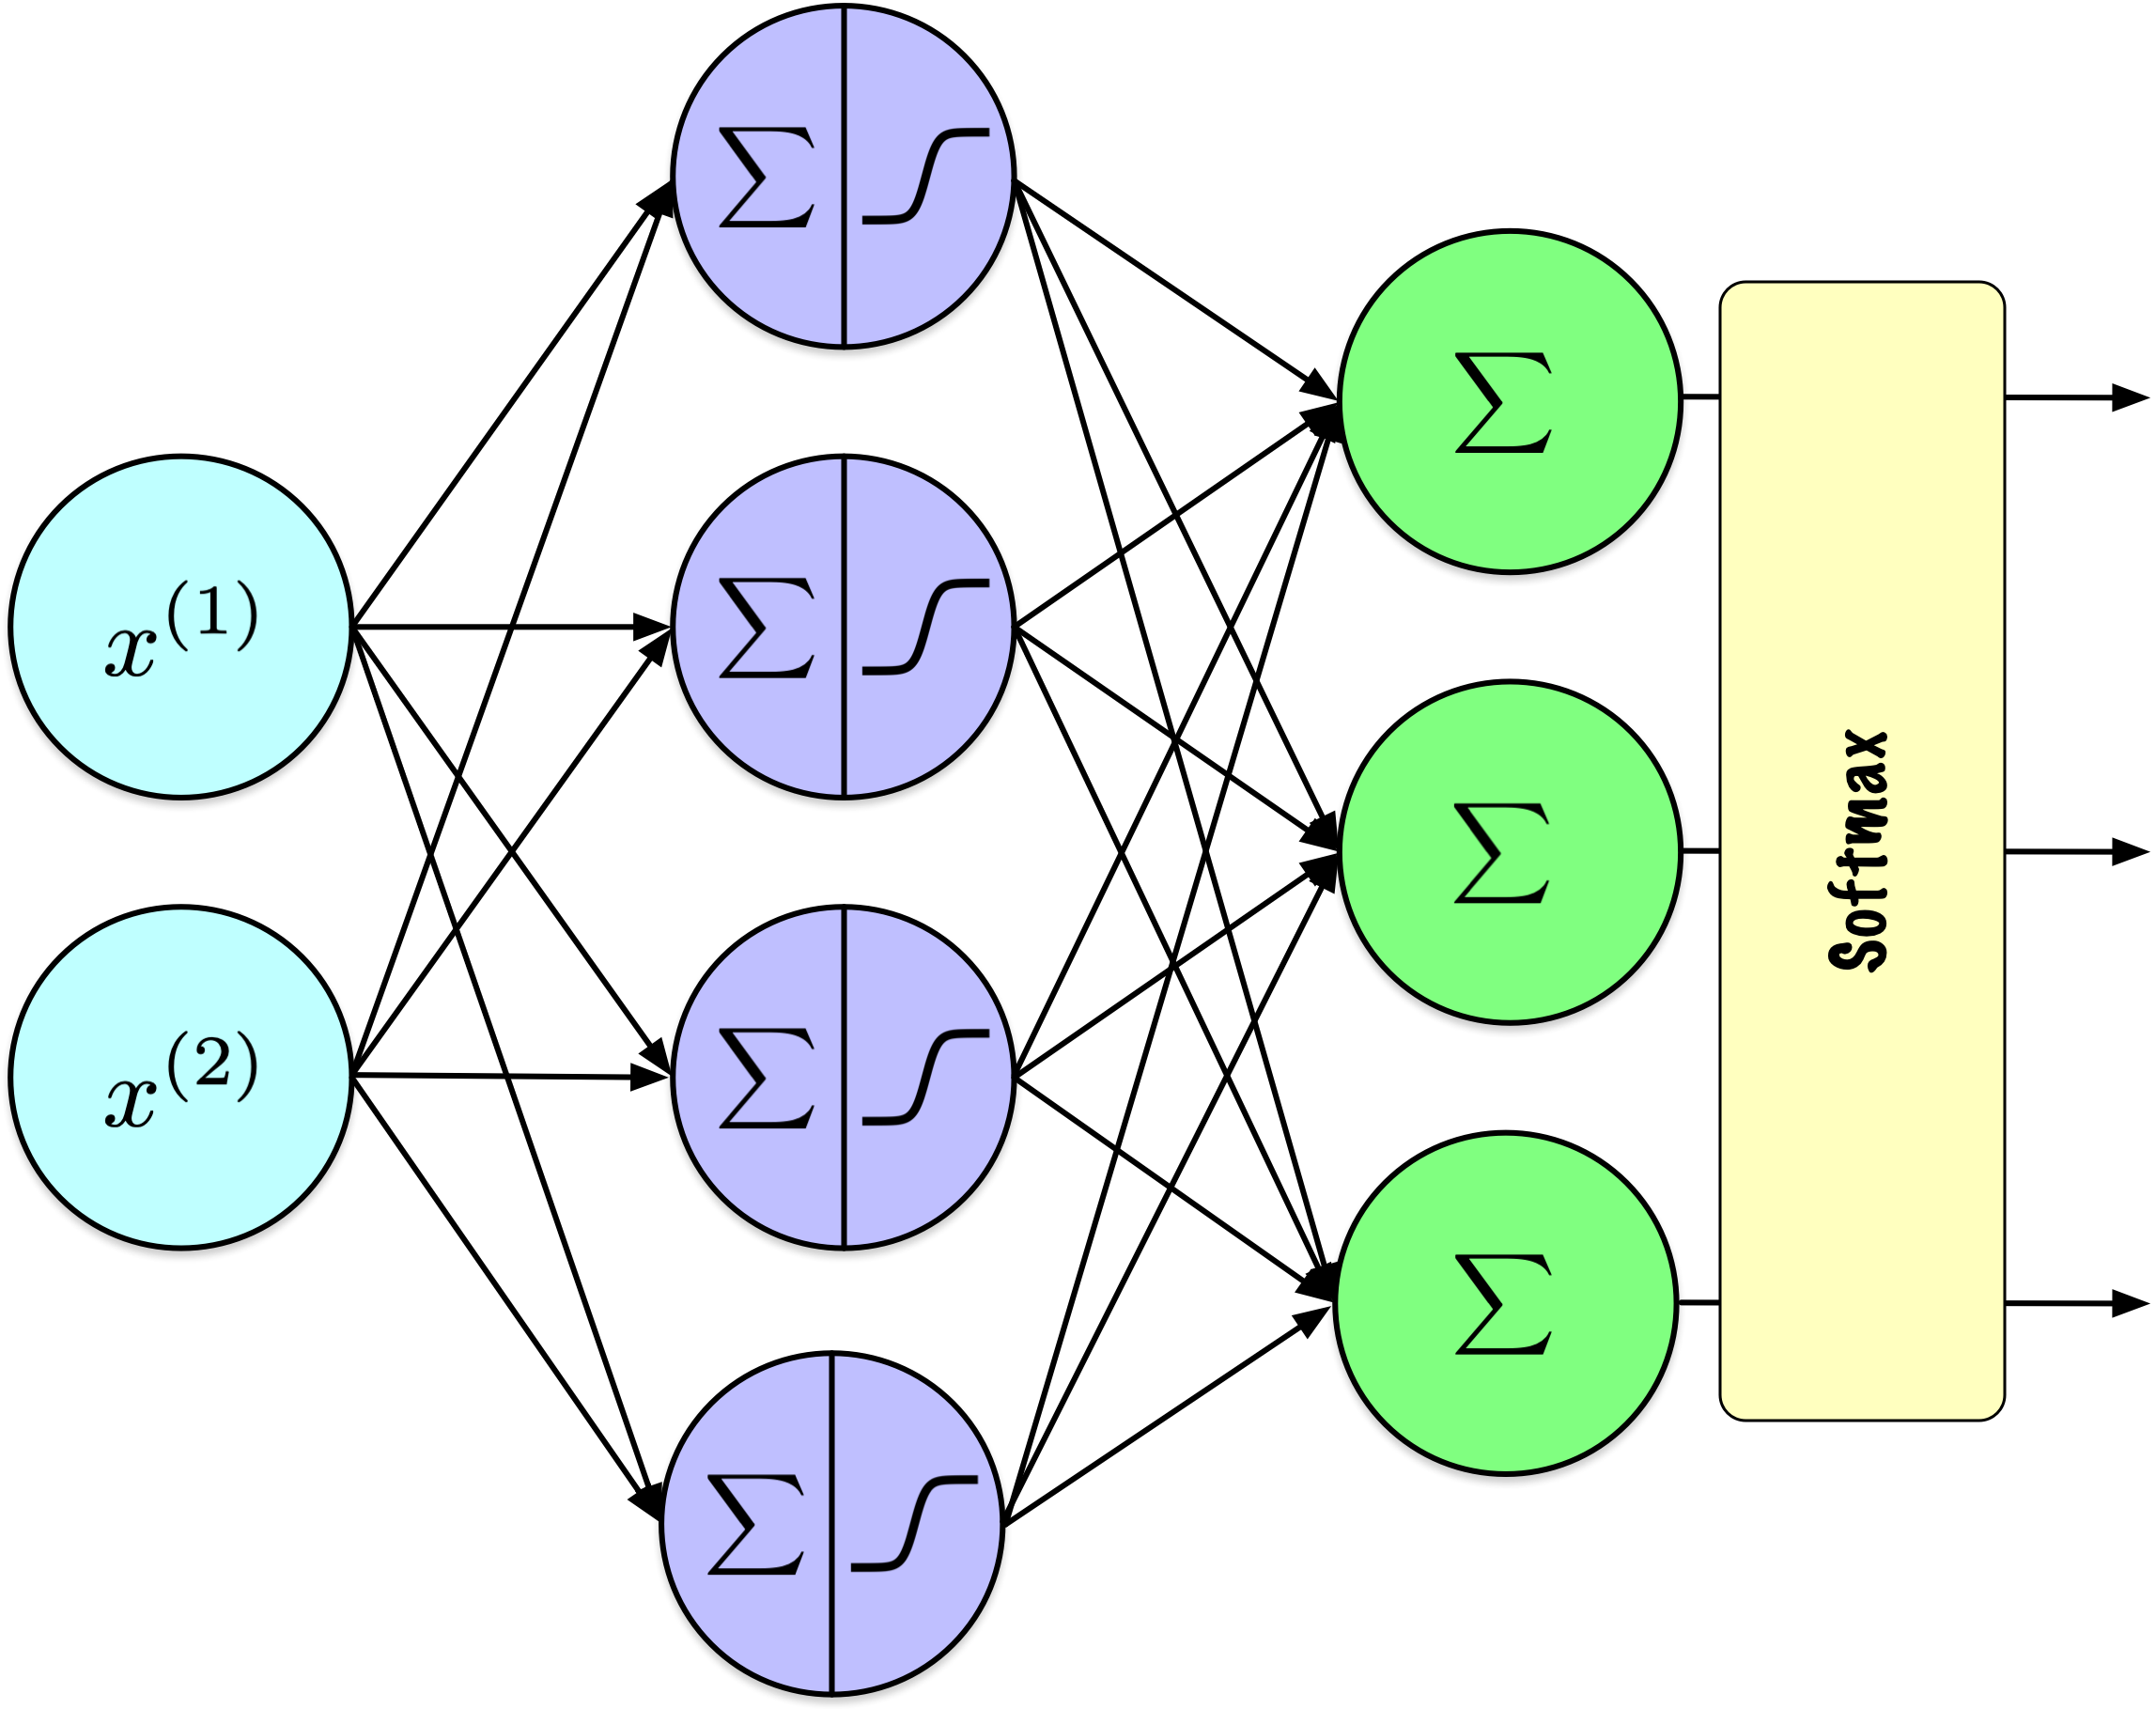

**Softmax** garantit que toutes les sorties d’activation se situent
entre 0 et 1 et que leur somme est égale à 1.

Remarquez que j’ai révisé la représentation des nœuds de sortie pour
indiquer que la fonction softmax est appliquée à l’ensemble de la
couche, plutôt qu’à des nœuds individuels. Cette fonction transforme les
valeurs brutes de sortie de la couche en probabilités qui totalisent 1,
facilitant ainsi la classification multiclasses. Cette caractéristique
la distingue des fonctions d’activation comme ReLU ou sigmoid, qui sont
généralement appliquées indépendamment à la sortie de chaque nœud.

La fonction $\argmax$ n’est pas appropriée pour l’optimisation par des
méthodes basées sur les gradients, car sa dérivée est nulle dans tous
les cas, comme pour les fonctions de seuil. En revanche, la fonction
softmax offre à la fois une interprétation probabiliste et une dérivée
calculable, la rendant plus efficace pour de telles applications.

La fonction $\argmax$ peut être appliquée *a posteriori* aux réseaux
entraînés pour faire des prédictions de classe.

## Softmax

La **fonction softmax** est une **fonction d’activation** utilisée dans
les **problèmes de classification multiclasses** pour convertir un
vecteur de scores bruts en **probabilités qui totalisent 1**.

Étant donné un vecteur $\mathbf{z} = [z_1, z_2, \ldots, z_n]$ :

$$
\sigma(\mathbf{z})_i = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}}
$$

où $\sigma(\mathbf{z})_i$ est la probabilité de la classe $i$, et $n$
est le nombre de classes.

La fonction softmax met l’accent sur les scores les plus élevés tout en
atténuant les scores les plus faibles, permettant une interprétation
probabiliste des sorties.

On peut clairement voir que cette activation s’applique à l’ensemble de
la couche, puisque la dénomination dépend des valeurs de tous les $z_j$,
pour $j \in 1 \ldots n$.

## Softmax

|    $z_1$ |    $z_2$ |    $z_3$ | $\sigma(z_1)$ | $\sigma(z_2)$ | $\sigma(z_3)$ | $\sum$ |
|--------:|--------:|--------:|-------------:|-------------:|-------------:|-------:|
| **1.47** |    -0.39 |     0.22 |      **0.69** |          0.11 |          0.20 |   1.00 |
|     5.00 | **6.00** |     4.00 |          0.24 |      **0.67** |          0.09 |   1.00 |
|     0.90 |     0.80 | **1.10** |          0.32 |          0.29 |      **0.39** |   1.00 |
|    -2.00 | **2.00** |    -3.00 |          0.02 |      **0.98** |          0.01 |   1.00 |

Valeurs de softmax pour un vecteur de longueur 3.

1.  **Maintient l’ordre relatif** : La fonction softmax préserve l’ordre
    relatif des valeurs d’entrée. Si une entrée est supérieure à une
    autre, sa sortie correspondante sera également supérieure.

2.  **Interprétée comme des probabilités** : Chaque valeur se situe dans
    la plage de 0 à 1. Les valeurs de sortie de la fonction softmax sont
    normalisées pour totaliser un, ce qui permet de les interpréter
    comme des probabilités.

3.  **Différences relatives** : Lorsque les différences relatives entre
    les valeurs d’entrée sont petites, les différences dans les
    probabilités de sortie restent petites, reflétant la distribution
    des entrées. Lorsque les valeurs d’entrée sont identiques, les
    sorties seront égales à $\frac{1}{n}$, où $n$ est le nombre de
    classes.

4.  **Large gamme de valeurs** : La fonction softmax peut traiter
    efficacement une large gamme de valeurs d’entrée, grâce à la
    fonction exponentielle et à la normalisation, qui adaptent les
    entrées à une plage probabiliste.

Ces propriétés rendent la fonction softmax particulièrement utile pour
les tâches de classification multiclasses en apprentissage automatique.

## Softmax

<https://www.youtube.com/watch?v=KpKog-L9veg>

## Fonction de perte d’entropie croisée

L’**entropie croisée** dans une **tâche de classification multiclasses**
pour un exemple :

$$
J(W) = -\sum_{k=1}^{K} y_k \log(\hat{y}_k)
$$

Où :

-   $K$ est le **nombre de classes**.
-   $y_k$ est la **distribution réelle** pour la classe $k$.
-   $\hat{y}_k$ est la **probabilité prédite** de la classe $k$ par le
    modèle.

-   Le vecteur cible $y$ est exprimé comme un vecteur encodé one-hot de
    longueur $K$, où l’élément correspondant à la classe réelle est fixé
    à 1, et tous les autres éléments sont à 0.

-   Par conséquent, dans la somme sur les classes, seul le terme associé
    à la classe réelle contribue une valeur non nulle.

-   Ainsi, la perte d’entropie croisée pour un exemple unique est donnée
    par $-\log(\hat{y}_k)$, où $\hat{y}_k$ est la probabilité prédite
    pour la classe réelle.

-   La probabilité prédite $\hat{y}_k$ est dérivée de la fonction
    softmax appliquée à la couche de sortie du réseau neuronal.

## Fonction de perte d’entropie croisée

-   **Problème de classification** : 3 classes
    -   Versicolour, Setosa, Virginica.
-   **Encodage one-hot** :
    -   Setosa = $[0, 1, 0]$.
-   **Sorties Softmax & Perte** :
    -   $[0.22,\mathbf{0.7}, 0.08]$ : Perte = $-\log(0.7) = 0.3567$.
    -   $[0.7, \mathbf{0.22}, 0.08]$ : Perte = $-\log(0.22) = 1.5141$.
    -   $[0.7, \mathbf{0.08}, 0.22]$ : Perte = $-\log(0.08) = 2.5257$.

Parmi les sorties softmax, l’entropie croisée n’évalue que la composante
correspondant à $k=1$ (Setosa), car les autres entrées dans le vecteur
encodé one-hot sont nulles. Cet élément pertinent est mis en évidence en
gras. Lorsque la prédiction softmax correspond étroitement à la valeur
attendue, la perte résultante est minimale (0.3567). À l’inverse,
lorsque la prédiction s’éloigne de la valeur attendue, la perte augmente
(1.5141 et 2.5257).

## Cas : un exemple

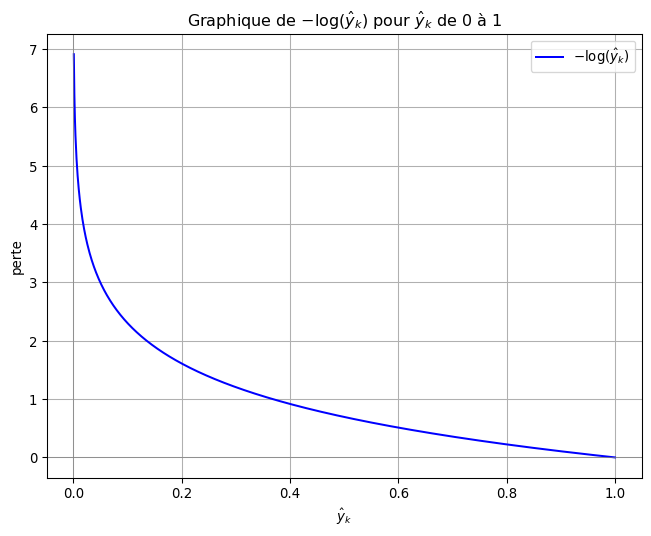

-   Dans la somme, seul le terme où $y_k = 1$ contribue une valeur non
    nulle.

-   En raison du signe négatif précédant la somme, la valeur de la
    fonction est $-\log(\hat{y}_k)$.

-   Si la probabilité prédite $\hat{y}_k$ est proche de 1, la perte
    approche de zéro, indiquant une pénalité minimale.

-   À l’inverse, lorsque $\hat{y}_k$ approche de 0, indiquant une
    mauvaise prédiction, la perte approche l’infini. Cette pénalité
    importante permet à la perte d’entropie croisée de converger plus
    rapidement que l’erreur quadratique moyenne.

## Cas : ensemble de données

Pour un ensemble de données avec $N$ exemples, la **perte moyenne
d’entropie croisée** sur tous les exemples est calculée comme suit :

$$
L = -\frac{1}{N} \sum_{i=1}^{N} \sum_{k=1}^{K} y_{i,k} \log(\hat{y}_{i,k})
$$

Où :

-   $i$ est l’index des **exemples** dans l’ensemble de données.
-   $y_{i,k}$ et $\hat{y}_{i,k}$ sont respectivement les **valeurs
    réelles** et les **probabilités prédites** pour la classe $k$ de
    l’exemple $i$.

# Régularisation

## Définition

La **régularisation** regroupe un ensemble de techniques visant à
améliorer la capacité de généralisation d’un modèle en **atténuant le
surapprentissage**. En **décourageant une complexité excessive du
modèle**, ces méthodes **améliorent** la **robustesse** et la
**performance** du modèle sur des données non vues.

## Ajout de termes de pénalité à la perte

-   En optimisation numérique, il est courant d’**ajouter des termes
    supplémentaires** à la **fonction objectif** afin de **dissuader
    certaines caractéristiques indésirables du modèle**.

-   Pour un **problème de minimisation**, le processus d’optimisation
    vise à **éviter des coûts élevés** associés à ces **termes de
    pénalité**.

## Fonction de perte

Prenons la fonction de perte de l’**erreur absolue moyenne** :

$$
  \mathrm{MAE}(X,W) = \frac{1}{N} \sum_{i=1}^{N} | h_W(x_i) - y_i |
$$

Où :

-   $W$ sont les poids de notre réseau.
-   $h_W(x_i)$ est la sortie du réseau pour l’exemple $i$.
-   $y_i$ est la vraie étiquette pour l’exemple $i$.

## Terme(s) de pénalité

Un ou plusieurs termes peuvent être ajoutés à la perte :

$$
  \mathrm{MAE}(X,W) = \frac{1}{N} \sum_{i=1}^{N} | h_W(x_i) - y_i | + \mathrm{pénalité}
$$

## Norme

Une **norme** assigne une longueur non négative à un vecteur.

La **norme $\ell_p$** d’un vecteur
$\mathbf{z} = [z_1, z_2, \ldots, z_n]$ est définie comme suit :

$$
  \|\mathbf{z}\|_p = \left( \sum_{i=1}^{n} |z_i|^p \right)^{1/p}
$$

Avec des valeurs de $p$ plus grandes, la norme $\ell_p$ met de plus en
plus l’accent sur les valeurs de $z_i$ les plus grandes à cause de
l’exponentiation.

Une **norme** est une fonction qui attribue une longueur ou taille non
négative à chaque vecteur dans un espace vectoriel, en respectant
certaines propriétés : positivité, multiplication scalaire, inégalité
triangulaire, et le fait que la norme est nulle si et seulement si le
vecteur est nul.

## Normes $\ell_1$ et $\ell_2$

La **norme $\ell_1$** (**norme de Manhattan**) est :

$$
  \|\mathbf{z}\|_1 = \sum_{i=1}^{n} |z_i|
$$

La **norme $\ell_2$** (**norme euclidienne**) est :

$$
  \|\mathbf{z}\|_2 = \sqrt{\sum_{i=1}^{n} z_i^2}
$$

## Régularisation $l_1$ et $l_2$

Ci-dessous, $\alpha$ et $\beta$ déterminent le degré de régularisation
appliqué ; fixer ces valeurs à zéro désactive effectivement le terme de
régularisation.

$$
  \mathrm{MAE}(X,W) = \frac{1}{N} \sum_{i=1}^{N} | h_W(x_i) - y_i | + \alpha \ell_1 + \beta \ell_2
$$

## Recommandations

-   **Régularisation $\ell_1$** :
    -   Encourage la **parcimonie**, mettant à zéro beaucoup de poids.
    -   Utile pour la **sélection d’attributs** en réduisant la
        dépendance à certains attributs.
-   **Régularisation $\ell_2$** :
    -   Encourage des **poids petits et répartis** pour la stabilité.
    -   Idéal lorsque **toutes les attributs contribuent** et que la
        réduction de la complexité est primordiale.

## Exemple Keras

In [2]:
import tensorflow as tf
from tensorflow.python.keras.layers import Dense

regularizer = tf.keras.regularizers.l2(0.001)

dense = Dense(50, kernel_regularizer=regularizer)

Cette couche utilise spécifiquement la régularisation $\ell_2$,
contrairement à la discussion précédente où la régularisation était
appliquée globalement à l’ensemble du modèle.

## Dropout

Le **dropout** est une technique de régularisation dans les réseaux
neuronaux où *des neurones sélectionnés aléatoirement sont ignorés
pendant l’entraînement*, réduisant ainsi le surapprentissage en
**empêchant la co-adaptation des attributs**.

Hinton et al. (2012)

## Dropout

-   Lors de chaque étape d’entraînement, chaque neurone dans une couche
    de dropout a une probabilité $p$ d’être **exclu du calcul**, des
    valeurs typiques de $p$ allant de 10 % à 50 %.

-   Bien que cela puisse sembler contre-intuitif, cette approche
    **empêche le réseau de dépendre de neurones spécifiques**,
    favorisant ainsi la **distribution des représentations apprises sur
    plusieurs neurones**.

## Dropout

-   Le dropout est l’une des méthodes de régularisation **les plus
    populaires** et **les plus efficaces** pour réduire le
    surapprentissage.

-   L’amélioration typique des performances est **modeste**,
    généralement autour de 1 à 2 %.

## Keras

In [3]:
import keras
from keras.models import Sequential
from keras.layers import InputLayer, Dropout, Flatten, Dense

model = tf.keras.Sequential([
    InputLayer(shape=[28, 28]),
    Flatten(),
    Dropout(rate=0.2),
    Dense(300, activation="relu"),
    Dropout(rate=0.2),
    Dense(100, activation="relu"),
    Dropout(rate=0.2),
    Dense(10, activation="softmax")
])

Ajout de couches `Dropout` au modèle Fashion-MNIST de la dernière leçon.

Le taux de dropout peut différer entre les couches ; des taux plus
élevés peuvent être appliqués aux couches plus larges, tandis que des
taux plus petits sont adaptés aux couches plus petites. Il est courant
dans de nombreux réseaux d’appliquer le dropout uniquement après la
dernière couche cachée.

## Définition

L’**arrêt anticipé** (*early stopping*) est une technique de
régularisation qui interrompt l’entraînement dès que la performance du
modèle sur un ensemble de validation commence à se dégrader, empêchant
ainsi le surapprentissage en s’arrêtant avant que le modèle n’apprenne
le bruit.

Geoffrey Hinton appelle cela le *“beau repas gratuit.”*

## Early Stopping

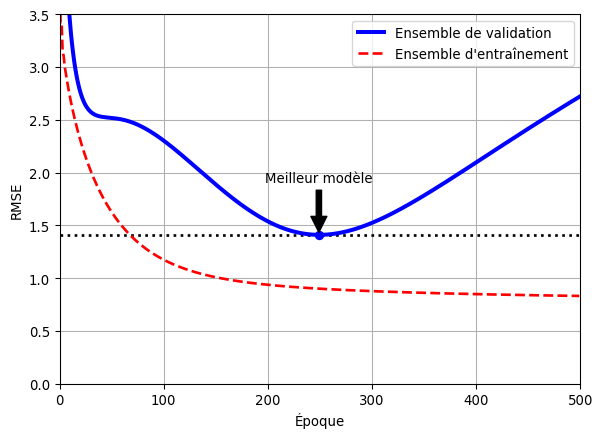

**Attribution** : Géron (2022),
[04_training_linear_models.ipynb](https://github.com/ageron/handson-ml3/blob/main/04_training_linear_models.ipynb).

# Prologue

## Résumé

-   **Réseaux neuronaux artificiels (ANNs)** :
    -   Inspirés des réseaux neuronaux biologiques.
    -   Composés de neurones interconnectés organisés en couches.
    -   Applicables à l’apprentissage supervisé, non supervisé, et par
        renforcement.
-   **Réseaux neuronaux à propagation directe (FNNs)** :
    -   L’information circule unidirectionnellement de l’entrée à la
        sortie.
    -   Composés de couches d’entrée, cachées et de sortie.
    -   Le nombre de couches et de neurones par couche peut varier.
-   **Fonctions d’activation** :
    -   Introduisent de la non-linéarité pour permettre l’apprentissage
        de modèles complexes.
    -   Fonctions courantes : Sigmoid, Tanh, ReLU, Leaky ReLU.
    -   Le choix de la fonction d’activation affecte le flux de gradient
        et les performances du réseau.
-   **Théorème de l’approximation universelle** :
    -   Un réseau neuronal avec une seule couche cachée peut approximer
        toute fonction continue.
-   **Algorithme de rétropropagation** :
    -   L’entraînement implique une passe avant, un calcul de perte, une
        passe arrière et une mise à jour des poids.
    -   Utilise la descente de gradient pour minimiser la fonction de
        perte.
    -   Permet l’entraînement des perceptrons multicouches en ajustant
        les poids internes.
-   **Problème du gradient qui disparaît** :
    -   Les gradients deviennent trop petits lors de la
        rétropropagation, ce qui freine l’entraînement.
    -   Stratégies de mitigation : utilisation de fonctions d’activation
        ReLU et d’une initialisation correcte des poids (Glorot ou He).
-   **Initialisation des poids** :
    -   L’initialisation aléatoire brise la symétrie et permet un
        apprentissage efficace.
    -   L’initialisation Glorot convient aux activations sigmoid et
        tanh.
    -   L’initialisation He est optimale pour ReLU et ses variantes.
-   **Fonctions de perte** :
    -   **Tâches de régression** : Erreur quadratique moyenne (MSE).
    -   **Tâches de classification** : Perte d’entropie croisée avec
        activation softmax pour les sorties multiclasses.
-   **Techniques de régularisation** :
    -   **Régularisation L1 et L2** : Ajouter des termes de pénalité à
        la perte pour décourager les poids élevés.
    -   **Dropout** : Désactiver aléatoirement des neurones pendant
        l’entraînement pour éviter le surapprentissage.
    -   **Early Stopping** : Interrompre l’entraînement lorsque la
        performance de validation se dégrade.
-   **Concepts clés** :
    -   Le taux d’apprentissage détermine la taille des pas pendant
        l’optimisation.
    -   La descente de gradient est utilisée pour mettre à jour les
        poids en minimisant la perte.
    -   Le choix des fonctions d’activation et des méthodes
        d’initialisation est crucial pour un entraînement efficace.

## 3Blue1Brown

Une série de vidéos, avec des animations, offrant l’**intuition**
derrière l’**algorithme de rétropropagation**.

-   [Neural
    networks](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi)
    (playlist)

    -   [What is backpropagation really
        doing?](https://www.youtube.com/watch?v=Ilg3gGewQ5U&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=3&t=212s)
        (12m 47s)
    -   [Backpropagation
        calculus](https://www.youtube.com/watch?v=tIeHLnjs5U8&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=4)
        (10m 18s)

Prérequis : [Gradient descent, how neural networks
learn?](https://www.youtube.com/watch?v=IHZwWFHWa-w&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=2)
(20m 33s)

## StatQuest

-   [Neural Networks Pt. 2: Backpropagation Main
    Ideas](https://youtu.be/IN2XmBhILt4) (17m 34s)
-   [Backpropagation Details Pt. 1: Optimizing 3 parameters
    simultaneously](https://youtu.be/iyn2zdALii8) (18m 32s)
-   [Backpropagation Details Pt. 2: Going bonkers with The Chain
    Rule](https://youtu.be/GKZoOHXGcLo) (13m 9s)

Prérequis : [The Chain Rule](https://youtu.be/wl1myxrtQHQ) (18m 24s) &
[Gradient Descent, Step-by-Step](https://youtu.be/sDv4f4s2SB8) (23m 54s)

## Herman Kamper

Une des séries de **vidéos** les plus complètes sur l’**algorithme de
rétropropagation**.

-   [Introduction to neural
    networks](https://www.youtube.com/playlist?list=PLmZlBIcArwhMHnIrNu70mlvZOwe6MqWYn)
    (playlist)

    -   [Backpropagation (without
        forks)](https://www.youtube.com/watch?v=6SW1oUztmzg&list=PLmZlBIcArwhMHnIrNu70mlvZOwe6MqWYn&index=7&t=680s)
        (31m 1s)
    -   [Backprop for a multilayer feedforward neural
        network](https://www.youtube.com/watch?v=dTupaVdrz1k&list=PLmZlBIcArwhMHnIrNu70mlvZOwe6MqWYn&index=8)
        (4m 2s)
    -   [Computational graphs and automatic differentiation for neural
        networks](https://www.youtube.com/watch?v=fBSm5ElvJEg&list=PLmZlBIcArwhMHnIrNu70mlvZOwe6MqWYn&index=9)
        (6m 56s)
    -   [Common derivatives for neural
        networks](https://www.youtube.com/watch?v=aqnjXWxiT0o&list=PLmZlBIcArwhMHnIrNu70mlvZOwe6MqWYn&index=10)
        (7m 18s)
    -   [A general notation for derivatives (in neural
        networks)](https://www.youtube.com/watch?v=Sa5_Gl_sYoI&list=PLmZlBIcArwhMHnIrNu70mlvZOwe6MqWYn&index=11)
        (7m 56s)
    -   [Forks in neural
        networks](https://www.youtube.com/watch?v=6mmEw738MQo&list=PLmZlBIcArwhMHnIrNu70mlvZOwe6MqWYn&index=12)
        (13m 46s)
    -   [Backpropagation in general (now with
        forks)](https://www.youtube.com/watch?v=aRkhgm2i4p0&list=PLmZlBIcArwhMHnIrNu70mlvZOwe6MqWYn&index=13)
        (3m 42s)

## Prochaine leçon

-   Nous introduirons différentes architectures de réseaux neuronaux
    artificiels.

## Références

Géron, Aurélien. 2022. *Hands-on Machine Learning with Scikit-Learn,
Keras, and TensorFlow*. 3ᵉ éd. O’Reilly Media, Inc.

Hinton, Geoffrey E., Nitish Srivastava, Alex Krizhevsky, Ilya Sutskever,
et Ruslan Salakhutdinov. 2012. « Improving neural networks by preventing
co-adaptation of feature detectors ». *CoRR* abs/1207.0580.
<http://arxiv.org/abs/1207.0580>.

Russell, Stuart, et Peter Norvig. 2020. *Artificial Intelligence: A
Modern Approach*. 4ᵉ éd. Pearson. <http://aima.cs.berkeley.edu/>.

------------------------------------------------------------------------

Marcel **Turcotte**

<Marcel.Turcotte@uOttawa.ca>

École de **science informatique** et de génie électrique (**SI**GE)

Université d’Ottawa